In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
pd.options.display.max_columns = 200

In [32]:
gdelt_data = pd.read_csv('/home/ben/Downloads/20221015160000.export.CSV', on_bad_lines='skip', delimiter='\t', header=None)

In [33]:
fieldlist = ['GLOBALEVENTID',
'SQLDATE',
'MonthYear',
'Year',
'FractionDate',
'Actor1Code',
'Actor1Name',
'Actor1CountryCode',
'Actor1KnownGroupCode',
'Actor1EthnicCode',
'Actor1Religion1Code',
'Actor1Religion2Code',
'Actor1Type1Code',
'Actor1Type2Code',
'Actor1Type3Code',
'Actor2Code',
'Actor2Name	',
'Actor2CountryCode',
'Actor2KnownGroupCode',
'Actor2EthnicCode',
'Actor2Religion1Code',
'Actor2Religion2Code',
'Actor2Type1Code',
'Actor2Type2Code',
'Actor2Type3Code',
'IsRootEvent',
'EventCode',
'EventBaseCode',
'EventRootCode',
'QuadClass',
'GoldsteinScale',
'NumMentions',
'NumSources',
'NumArticles',
'AvgTone',
'Actor1Geo_Type',
'Actor1Geo_FullName',
'Actor1Geo_CountryCode',
'Actor1Geo_ADM1Code',
'Actor1Geo_ADM2Code',
'Actor1Geo_Lat',
'Actor1Geo_Long',
'Actor1Geo_FeatureIDActor1Geo_Type',
'Actor2Geo_Type',
'Actor2Geo_FullName',
'Actor2Geo_CountryCode',
'Actor2Geo_ADM1Code',
'Actor2Geo_ADM2Code',
'Actor2Geo_Lat',
'Actor2Geo_Long',
'Actor2Geo_FeatureIDActor2Geo_Type',
'ActionGeo_Type',
'ActionGeo_FullName',
'ActionGeo_CountryCode',
'ActionGeo_ADM1Code',
'ActionGeo_ADM2Code',
'ActionGeo_Lat',
'ActionGeo_Long',
'ActionGeo_FeatureID',
'DATEADDED',
'SOURCEUR']

In [34]:
#gdelt_data = gdelt_data.rename(columns=dict(zip(gdelt_data.columns,fieldlist)))
gdelt_data.columns = fieldlist
gdelt_data = gdelt_data.dropna(axis=0, subset = ['ActionGeo_Lat','ActionGeo_Long'])

In [35]:
gdelt_data

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name\t,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_ADM2Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureIDActor1Geo_Type,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureIDActor2Geo_Type,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEUR
0,1067720621,20211015,202110,2021,2021.7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARE,UNITED ARAB EMIRATES,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,40,40,4,1,1.0,1,1,1,0.650407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Canada,CA,CA,NaN,60.0000,-96.0000,CA,4,"Dubai, Dubayy, United Arab Emirates",AE,AE03,28575,25.2522,55.2800,-782831,20221015160000,https://www.ainonline.com:443/aviation-news/bu...
1,1067720622,20211015,202110,2021,2021.7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARE,DUBAI,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,60,60,6,2,6.0,7,1,7,0.650407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Dubai, Dubayy, United Arab Emirates",AE,AE03,28575,25.2522,55.2800,-782831,4,"Dubai, Dubayy, United Arab Emirates",AE,AE03,28575,25.2522,55.2800,-782831,20221015160000,https://www.ainonline.com:443/aviation-news/bu...
2,1067720623,20211015,202110,2021,2021.7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARE,DUBAI,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,60,60,6,2,6.0,1,1,1,0.650407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Canada,CA,CA,NaN,60.0000,-96.0000,CA,1,Canada,CA,CA,NaN,60.0000,-96.0000,CA,20221015160000,https://www.ainonline.com:443/aviation-news/bu...
3,1067720624,20211015,202110,2021,2021.7808,IGOEUREEC,THE EUROPEAN UNION,EUR,EEC,NaN,NaN,NaN,IGO,NaN,NaN,MNCGBRHLH,ASTRAZENECA,GBR,NaN,NaN,NaN,NaN,MNC,HLH,NaN,1,20,20,2,1,3.0,10,1,10,-8.000000,1,China,CH,CH,NaN,35.0000,105.0000,CH,1,China,CH,CH,NaN,35.0000,105.0000,CH,1,China,CH,CH,NaN,35.0000,105.0000,CH,20221015160000,https://focustaiwan.tw/society/202210150017
5,1067720626,20211015,202110,2021,2021.7808,KGZ,BISHKEK,KGZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LKA,SRI LANKA,LKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,20,2,1,3.0,8,1,8,1.678657,4,"Bishkek, Bishkek, Kyrgyzstan",KG,KG01,37216,42.8731,74.6003,-2331392,1,Sri Lanka,CE,CE,NaN,7.0000,81.0000,CE,4,"Bishkek, Bishkek, Kyrgyzstan",KG,KG01,37216,42.8731,74.6003,-2331392,20221015160000,https://www.timesca.com/index.php/component/ta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1067721500,20221015,202210,2022,2022.7808,USAGUM,GUAM,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CVL,RESIDENTS,NaN,NaN,NaN,NaN,NaN,CVL,NaN,NaN,1,172,172,17,4,-5.0,10,1,10,-3.974221,1,Guam,GQ,GQ,NaN,13.2613,145.0960,GQ,1,Guam,GQ,GQ,NaN,13.2613,145.0960,GQ,1,Guam,GQ,GQ,NaN,13.2613,145.0960,GQ,20221015160000,https://www.heritage.org/civil-rights/commenta...
880,1067721501,20221015,202210,2022,2022.7808,USAJUD,UNITED STATES,USA,NaN,NaN,NaN,NaN,JUD,NaN,NaN,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51,51,5,1,3.4,4,1,4,-4.648760,3,"Baltimore, Maryland, United States",US,USMD,MD510,39.2904,-76.6122,597040,3,"Baltimore, Maryland, United States",US,USMD,MD510,39.2904,-76.6122,597040,2,"Maryland, United States",US,USMD,NaN,39.0724,-76.7902,MD,20221015160000,https://www.bhpioneer.com/a_and_e/prosecutors-...
881,1067721502,20221015,202210,2022,2022.7808,USAMIL,THE US,U

In [36]:
gdelt_geo = gpd.GeoDataFrame(
    gdelt_data, geometry=gpd.points_from_xy(gdelt_data.ActionGeo_Long, gdelt_data.ActionGeo_Lat))

<AxesSubplot: >

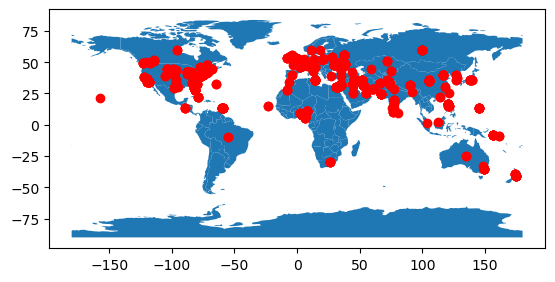

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot()
gdelt_geo.plot(ax=ax, color='red')

In [38]:
from folium.plugins import HeatMap

In [39]:
gdelt_geo.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name\t,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_ADM2Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureIDActor1Geo_Type,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureIDActor2Geo_Type,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEUR,geometry
0,1067720621,20211015,202110,2021,2021.7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARE,UNITED ARAB EMIRATES,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,40,40,4,1,1.0,1,1,1,0.650407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Canada,CA,CA,NaN,60.0000,-96.00,CA,4,"Dubai, Dubayy, United Arab Emirates",AE,AE03,28575,25.2522,55.2800,-782831,20221015160000,https://www.ainonline.com:443/aviation-news/bu...,POINT (55.28000 25.25220)
1,1067720622,20211015,202110,2021,2021.7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARE,DUBAI,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,60,60,6,2,6.0,7,1,7,0.650407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Dubai, Dubayy, United Arab Emirates",AE,AE03,28575,25.2522,55.28,-782831,4,"Dubai, Dubayy, United Arab Emirates",AE,AE03,28575,25.2522,55.2800,-782831,20221015160000,https://www.ainonline.com:443/aviation-news/bu...,POINT (55.28000 25.25220)
2,1067720623,20211015,202110,2021,2021.7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARE,DUBAI,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,60,60,6,2,6.0,1,1,1,0.650407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Canada,CA,CA,NaN,60.0000,-96.00,CA,1,Canada,CA,CA,NaN,60.0000,-96.0000,CA,20221015160000,https://www.ainonline.com:443/aviation-news/bu...,POINT (-96.00000 60.00000)
3,1067720624,20211015,202110,2021,2021.7808,IGOEUREEC,THE EUROPEAN UNION,EUR,EEC,NaN,NaN,NaN,IGO,NaN,NaN,MNCGBRHLH,ASTRAZENECA,GBR,NaN,NaN,NaN,NaN,MNC,HLH,NaN,1,20,20,2,1,3.0,10,1,10,-8.000000,1,China,CH,CH,NaN,35.0000,105.0000,CH,1,China,CH,CH,NaN,35.0000,105.00,CH,1,China,CH,CH,NaN,35.0000,105.0000,CH,20221015160000,https://focustaiwan.tw/society/202210150017,POINT (105.00000 35.00000)
5,1067720626,20211015,202110,2021,2021.7808,KGZ,BISHKEK,KGZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LKA,SRI LANKA,LKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,20,2,1,3.0,8,1,8,1.678657,4,"Bishkek, Bishkek, Kyrgyzstan",KG,KG01,37216,42.8731,74.6003,-2331392,1,Sri Lanka,CE,CE,NaN,7.0000,81.00,CE,4,"Bishkek, Bishkek, Kyrgyzstan",KG,KG01,37216,42.8731,74.6003,-2331392,20221015160000,https://www.timesca.com/index.php/component/ta...,POINT (74.60030 42.87310)


In [44]:
m = folium.Map()
HeatMap(gdelt_geo[['ActionGeo_Lat','ActionGeo_Long']]).add_to(m)

In [45]:
m